# KD Seminar
## Analyse der Modelle RNN/CNN

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [465]:
finance_data = pd.read_csv("aggregated_returns.csv",index_col=0)

# Load portfolio data
#
portfolio_data = pd.read_csv("predictions/predictions_rnn.csv",sep='\t')
#portfolio_data = pd.read_csv("predictions/predictions_frst_model.csv")



# Both Ascending by Time
finance_data = finance_data.sort_values('Timestamp')
portfolio_data = portfolio_data.sort_values('Timestamp')

# Set Index
finance_data = finance_data.set_index('Timestamp')
portfolio_data = portfolio_data.set_index('Timestamp')

stocks = finance_data.columns

In [458]:
# Set Both Datasets on same time range
start = max(portfolio_data.index.min(),finance_data.index.min())
end =  min(portfolio_data.index.max(),finance_data.index.max())
finance_data = finance_data.loc[start:end]
portfolio_data = portfolio_data.loc[start:end]


# Check has to be 0
portfolio_data.shape[0] - finance_data.shape[0]

0

---

In [459]:
# Shift portfolio binary variable to day where investment get paid out
# Set 1 to day when return is realized or 0 when return is not realized
for stock in stocks:
    portfolio_data[stock] = portfolio_data[stock].shift(1)

# Cant invest before the first day 
portfolio_data=portfolio_data.fillna(0)

---

In [460]:
# Calculate Mean return for equal weighted strategy
finance_data['Equal_Weighted_Mean'] = finance_data.mean(1,True)

# Shorting?
#finance_data = finance_data.apply(lambda row: row*-1)
#finance_data['Equal_Weighted_Mean'] = finance_data['Equal_Weighted_Mean']*-1

In [461]:
# Reset Index
# Damit .loc[] funktioniert
finance_data = finance_data.reset_index()
portfolio_data = portfolio_data.reset_index()

In [462]:
# Clear all return entries, where we do not want to invest
for stock in stocks:
    finance_data.loc[np.where(portfolio_data[stock]==0)[0],[stock]] = np.nan

In [463]:
# Calculate mean returns for model
finance_data['Model_Mean'] = finance_data.mean(1,True)

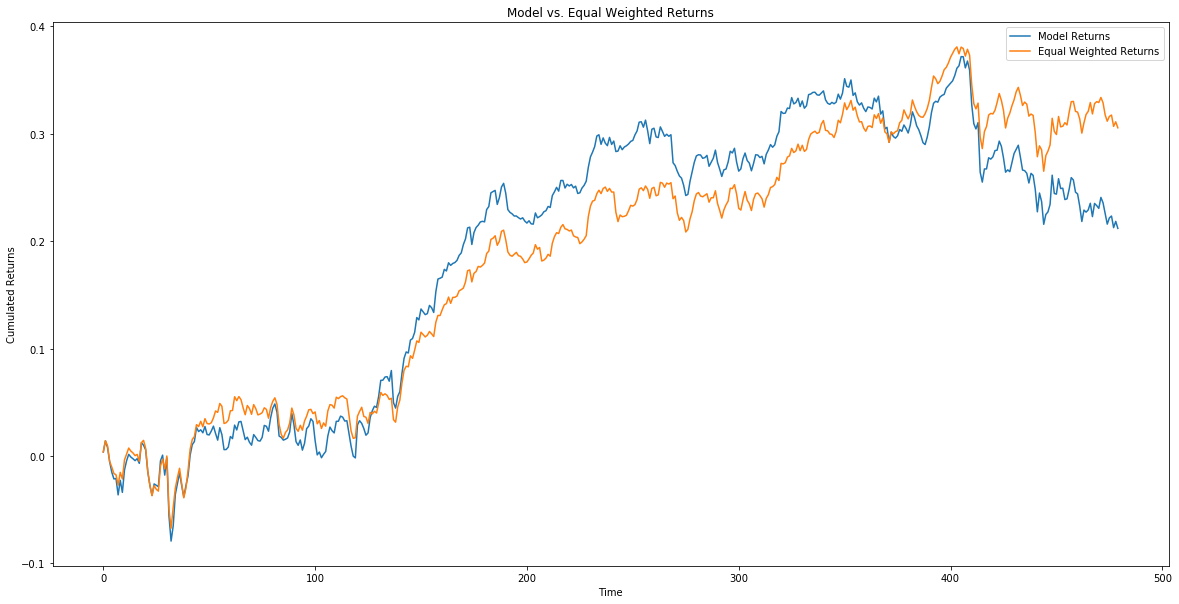

In [464]:
# Plot Model vs Equal Weight Strategy

plt.figure(0,figsize=[20,10])
plt.plot(finance_data['Model_Mean'].cumsum(),label="Model Returns")
plt.plot(finance_data['Equal_Weighted_Mean'].cumsum(),label="Equal Weighted Returns")

plt.title("Model vs. Equal Weighted Returns")
plt.xlabel("Time")
plt.ylabel("Cumulated Returns")
plt.legend()
plt.show()


---

---

In [415]:
portfolio_data[0:10]

,Timestamp,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
0,2016-05-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-05-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-05-11,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,2016-05-12,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,2016-05-13,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,2016-05-17,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
6,2016-05-18,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
7,2016-05-19,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,2016-05-20,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
9,2016-05-23,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [421]:
finance_data[0:10]

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2016-05-09,0.006953,-0.026668,0.011062,0.010655,0.022052,-0.028361,0.006453,0.000755,0.005540,0.010906,0.022717
2016-05-10,-0.002312,0.038928,0.005662,0.007354,0.001999,-0.001102,0.021635,0.006767,0.003193,0.019285,0.013479
2016-05-11,-0.003091,0.006478,-0.020318,0.000563,-0.001499,0.001293,-0.001080,-0.009789,-0.008587,-0.014331,-0.000554
2016-05-12,-0.008550,-0.007290,-0.015240,0.000375,-0.049716,-0.008072,-0.004692,-0.023736,-0.021274,-0.015464,-0.006860
2016-05-13,-0.022100,-0.026361,0.008374,-0.008482,0.010351,0.001591,-0.002536,0.001990,0.011284,-0.026090,-0.006236
2016-05-17,0.012739,-0.009110,-0.006183,0.005441,-0.004065,-0.017581,-0.018487,-0.004163,-0.000591,-0.030416,0.006856
2016-05-18,0.003160,-0.035567,0.004368,0.001122,0.006973,0.031313,-0.017142,0.011380,-0.000591,-0.007997,-0.010435
2016-05-19,0.001576,-0.015639,-0.010223,-0.003183,-0.085598,0.018951,0.001690,-0.003814,-0.016394,-0.004659,0.009784
2016-05-20,-0.000788,0.019940,0.010949,0.014150,0.011570,0.023285,0.020244,0.010770,0.011058,0.014611,-0.003230


In [422]:
finance_data[0:10].apply(lambda row: row*-1)

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2016-05-09,-0.006953,0.026668,-0.011062,-0.010655,-0.022052,0.028361,-0.006453,-0.000755,-0.005540,-0.010906,-0.022717
2016-05-10,0.002312,-0.038928,-0.005662,-0.007354,-0.001999,0.001102,-0.021635,-0.006767,-0.003193,-0.019285,-0.013479
2016-05-11,0.003091,-0.006478,0.020318,-0.000563,0.001499,-0.001293,0.001080,0.009789,0.008587,0.014331,0.000554
2016-05-12,0.008550,0.007290,0.015240,-0.000375,0.049716,0.008072,0.004692,0.023736,0.021274,0.015464,0.006860
2016-05-13,0.022100,0.026361,-0.008374,0.008482,-0.010351,-0.001591,0.002536,-0.001990,-0.011284,0.026090,0.006236
2016-05-17,-0.012739,0.009110,0.006183,-0.005441,0.004065,0.017581,0.018487,0.004163,0.000591,0.030416,-0.006856
2016-05-18,-0.003160,0.035567,-0.004368,-0.001122,-0.006973,-0.031313,0.017142,-0.011380,0.000591,0.007997,0.010435
2016-05-19,-0.001576,0.015639,0.010223,0.003183,0.085598,-0.018951,-0.001690,0.003814,0.016394,0.004659,-0.009784
2016-05-20,0.000788,-0.019940,-0.010949,-0.014150,-0.011570,-0.023285,-0.020244,-0.010770,-0.011058,-0.014611,0.003230
